In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

curveballs = pd.read_csv('savant_data.csv')

# General goal and idea for this dataset is to see how effective curveballs are at making batters miss. 

In [5]:
curveballs.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,203,450203,"Morton, Charlie",1271,16.0,0.224,0.194,0.328,0.418,0.270,...,0,-0.5,6.16,110,151,124,147,301,331,303
1,196,448179,"Hill, Rich",976,20.1,0.265,0.176,0.276,0.441,0.302,...,0,-1.1,6.05,106,153,119,148,288,325,291
2,191,657140,"Wright, Kyle",1282,14.9,0.250,0.060,0.357,0.310,0.241,...,0,-0.1,6.46,112,152,122,149,305,332,299
3,188,664285,"Valdez, Framber",1325,14.2,0.172,0.065,0.278,0.237,0.177,...,0,-0.9,6.02,110,154,118,148,295,322,288
4,184,605400,"Nola, Aaron",1341,13.7,0.194,0.204,0.269,0.398,0.251,...,0,0.4,6.85,109,151,128,142,296,323,293


In [6]:
curveballs.tail()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
364,1,669854,"Blanco, Ronel",120,0.8,NaN,NaN,NaN,NaN,NaN,...,0,0.2,6.6,124,148,128,153,292,297,296
365,1,658648,"Avila, Pedro",70,1.4,0.0,0.0,0.0,0.0,0.0,...,0,-0.8,6.4,113,163,126,147,301,322,303
366,1,663765,"Woodford, Jake",293,0.3,0.0,0.0,0.0,0.0,0.0,...,0,-0.5,6.5,115,156,122,151,314,337,315
367,1,663531,"Allen, Logan",164,0.6,NaN,NaN,NaN,NaN,NaN,...,0,-0.9,5.9,87,152,114,138,315,323,300
368,1,645261,"Alcantara, Sandy",1426,0.1,0.0,0.0,0.0,0.0,0.0,...,0,-0.2,6.1,117,151,135,156,305,329,310


<AxesSubplot:>

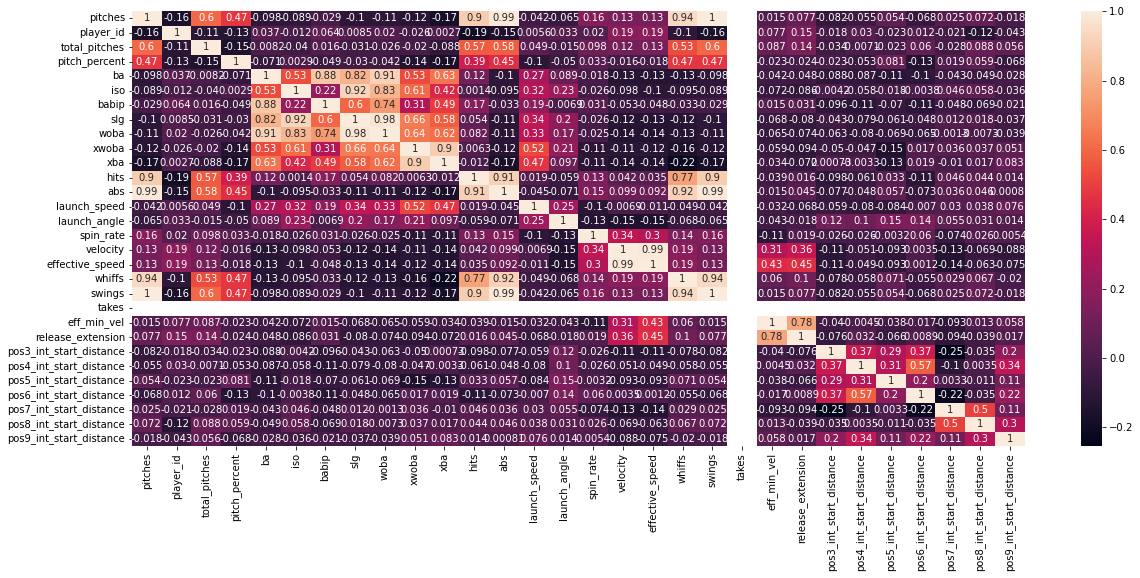

In [8]:
#Looking for general correlation with the data

plt.figure(figsize = (20,8))
sns.heatmap(curveballs.corr(), annot=True)

# Data cleaning

In [12]:
#with so many columns and not all of them being important to what we're looking for, I'm going to drop most of them.
#For the purpose of this analysis, the only pitches represented in this dataset are curveball pitches.

curveballs_clean = curveballs.drop(columns=['ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba', 'abs', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity', 'effective_speed', 'eff_min_vel', 'release_extension', 'pos3_int_start_distance', 'pos4_int_start_distance', 'pos5_int_start_distance', 'pos6_int_start_distance', 'pos7_int_start_distance', 'pos8_int_start_distance', 'pos9_int_start_distance'])

In [13]:
curveballs_clean.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
0,203,450203,"Morton, Charlie",1271,16.0,22.0,81,203,0
1,196,448179,"Hill, Rich",976,20.1,27.0,32,196,0
2,191,657140,"Wright, Kyle",1282,14.9,25.0,65,191,0
3,188,664285,"Valdez, Framber",1325,14.2,16.0,67,188,0
4,184,605400,"Nola, Aaron",1341,13.7,18.0,74,184,0


# Behold! A solid, basic analysis of most of the cleaned data.

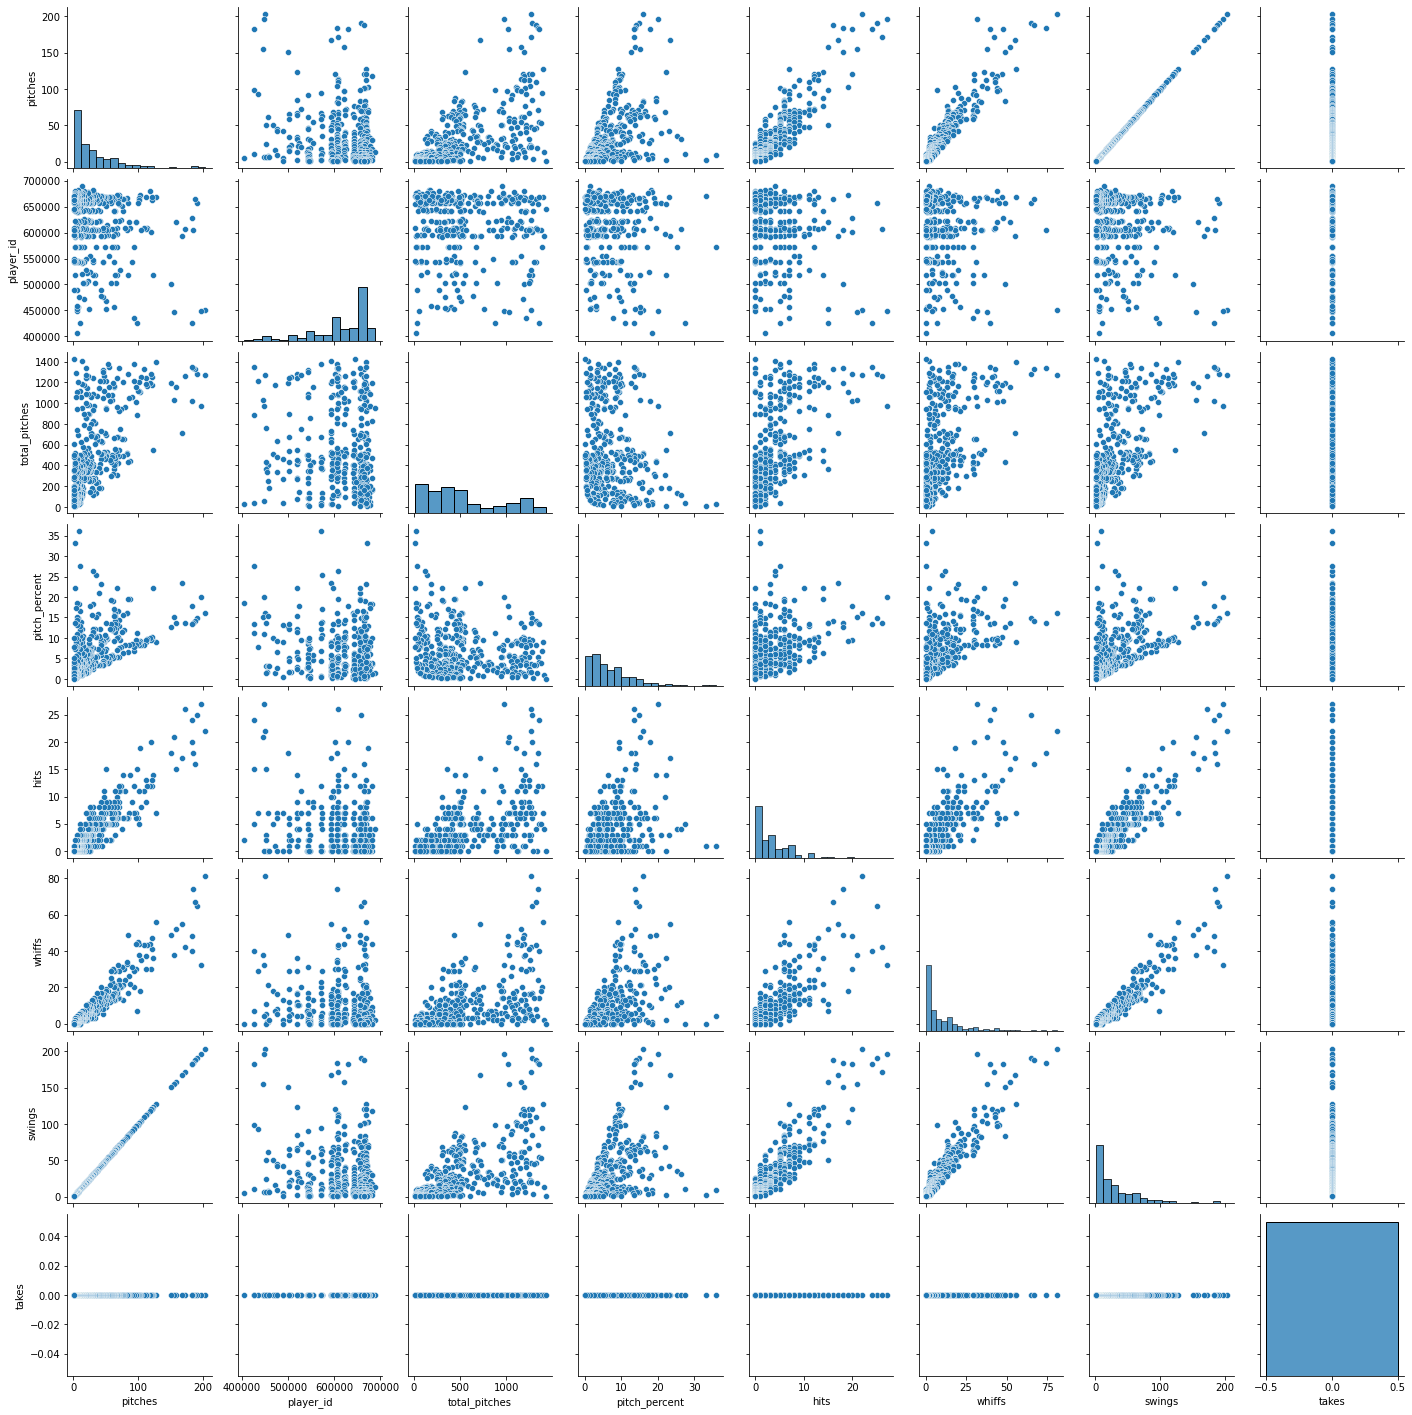

In [14]:
sns.pairplot(curveballs_clean)